<a href="https://colab.research.google.com/github/davis689/binder/blob/master/Michaelis_Menten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def MM(S,Km,Vmax): # define Michaelis-Menten equation
  return Vmax*S/(Km+S)

In [3]:
#@title Enter Michaelis-Menten parameters
Km = 1 #@param {type:"number"}
Vmax = 2 #@param {type:"number"}
S=np.linspace(0.01,10.01,100)


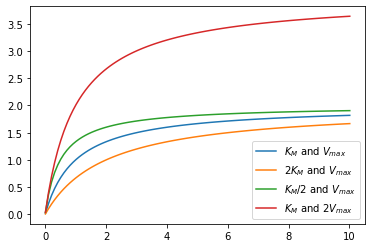

In [4]:
plt.plot(S,MM(S,Km,Vmax),label='$K_M$ and $V_{max}$')
plt.plot(S,MM(S,Km*2,Vmax),label='$2K_M$ and $V_{max}$')
plt.plot(S,MM(S,Km/2,Vmax),label='$K_M/2$ and $V_{max}$')
plt.plot(S,MM(S,Km,Vmax*2),label='$K_M$ and $2V_{max}$')
plt.legend()
plt.show()

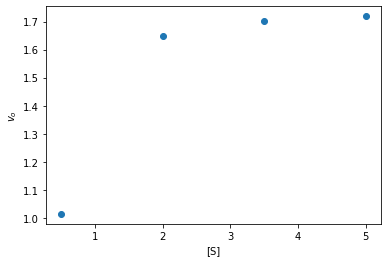

In [5]:
import random
S_data=[.5,2,3.5,5]
v0=[MM(s,Km,Vmax) for s in S_data]
err=[0.4*random.random() for i in range(len(S_data))]
v_real=[v0[i]+err[i] for i in range(len(S_data))]

plt.scatter(S_data,v_real)
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.show()

In [6]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(MM, S_data, v_real)
print(popt,[Km,Vmax])

[0.41777411 1.90845979] [1, 2]


In [7]:
def recMM(recS,Km,Vmax):
  return Km/Vmax*recS+1/Vmax

In [8]:
recS=[1/s for s in S_data] # fit reciprocal linear version
recv=[1/v for v in v_real]
popt2,pcov2=curve_fit(recMM,recS,recv)
print([popt2[0],popt2[1]],[Km,Vmax])

[0.44941041043884145, 1.9332810576668484] [1, 2]


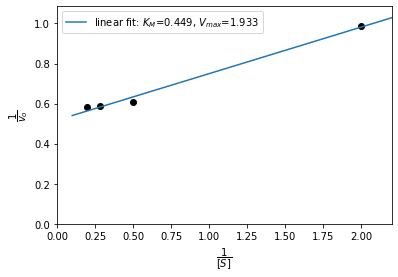

In [9]:
plt.plot(1/S,popt2[0]/popt2[1]/S+1/popt2[1],label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2)) 
plt.ylim(0,max(recv)*1.1)
plt.xlim(0,max(recS)*1.1)
plt.scatter(recS,recv,color='black')
plt.xlabel(r'$\dfrac{1}{[S]}$')
plt.ylabel(r'$\dfrac{1}{v_o}$')
plt.legend()
plt.show()

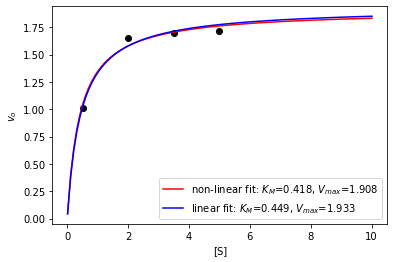

In [10]:
plt.scatter(S_data,v_real,color='black')
plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt))
plt.plot(S,MM(S,*popt2),'b',label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2))
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.legend()
plt.show()

The non-linear and linear fits give pretty similar results.

In [11]:
S_expt=[0.253,0.505,1.01,1.515,2.02,3.03,4.04,6.06,10.1]
v_expt=[0.751,0.999,1.719,3.033,3.152,4.58,4.874,6.201,7.077]

[ 4.00329965 10.02393901]


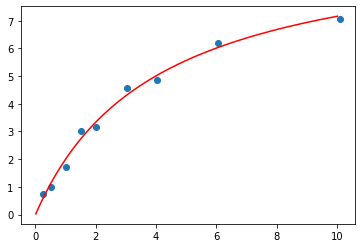

In [12]:
popt, pcov = curve_fit(MM, S_expt, v_expt)
print(popt)
plt.scatter(S_expt,v_expt)
plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt))

In [13]:
recS=[1/s for s in S_expt] # fit reciprocal linear version
recv=[1/v for v in v_expt]
popt2,pcov2=curve_fit(recMM,recS,recv)
print([popt2[0],popt2[1]])

[2.1458065030992453, 6.563437697630163]


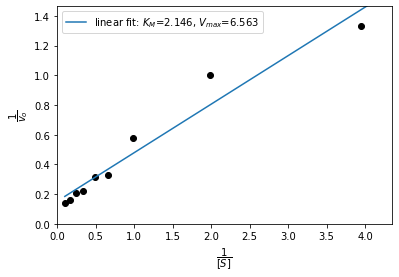

In [14]:
plt.plot(1/S,popt2[0]/popt2[1]/S+1/popt2[1],label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2)) 
plt.ylim(0,max(recv)*1.1)
plt.xlim(0,max(recS)*1.1)
plt.scatter(recS,recv,color='black')
plt.xlabel(r'$\dfrac{1}{[S]}$')
plt.ylabel(r'$\dfrac{1}{v_o}$')
plt.legend()
plt.show()

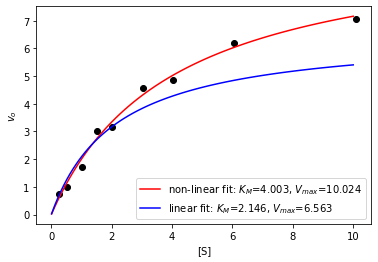

In [15]:
plt.scatter(S_expt,v_expt,color='black')
plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt))
plt.plot(S,MM(S,*popt2),'b',label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2))
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.legend()
plt.show()

In [16]:
def MM(S,Km,Vmax,I,KI1,KI2): # define Michaelis-Menten equation with inhibition
  return Vmax*S/(Km*(1+I/KI1)+S*(1+I/KI2))

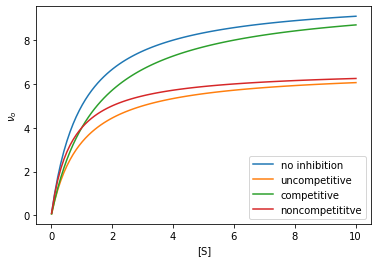

In [17]:
plt.plot(S,MM(S,1,10,0,10,10),label='no inhibition')
plt.plot(S,MM(S,1,10,5,10,10),label='uncompetitive')
plt.plot(S,MM(S,1,10,5,10,1e10),label='competitive')
plt.plot(S,MM(S,1,10,5,1e10,10),label='noncompetititve')
plt.legend()
plt.xlabel('[S]')
plt.ylabel(r'$\nu_o$')
plt.show()

(0.0, 2.0)

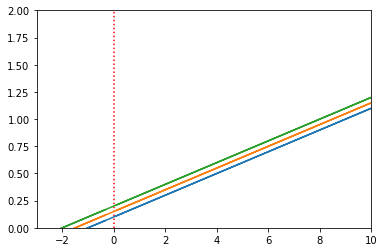

In [18]:
#uncompetitive
S=np.linspace(-3,10.01,100)

plt.plot(1/S,1/MM(S,1,10,0,10,10))
plt.plot(1/S,1/MM(S,1,10,5,1e10,10))
plt.plot(1/S,1/MM(S,1,10,10,1e10,10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)

(0.0, 2.0)

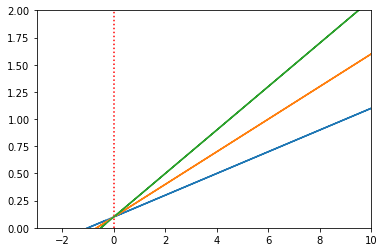

In [19]:
#Competitive
plt.plot(1/S,1/MM(S,1,10,0,10,10))
plt.plot(1/S,1/MM(S,1,10,5,10,1e10))
plt.plot(1/S,1/MM(S,1,10,10,10,1e10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)

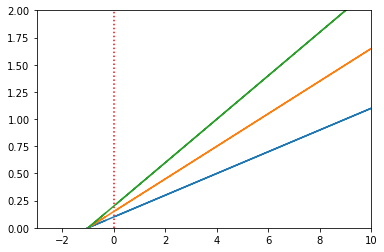

In [20]:
#nonompetitive
plt.plot(1/S,1/MM(S,1,10,0,10,10))
plt.plot(1/S,1/MM(S,1,10,5,10,10))
plt.plot(1/S,1/MM(S,1,10,10,10,10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)
plt.show()

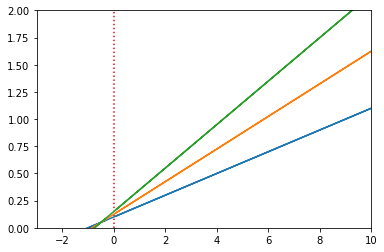

In [21]:
#mixed
plt.plot(1/S,1/MM(S,1,10,0,10,20))
plt.plot(1/S,1/MM(S,1,10,5,10,20))
plt.plot(1/S,1/MM(S,1,10,10,10,20))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)
plt.show()

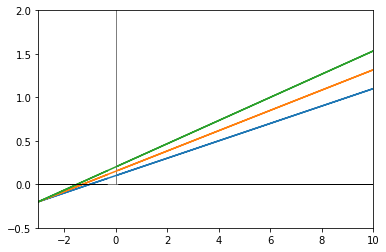

In [22]:
#mixed
plt.plot(1/S,1/MM(S,1,10,0,30,10))
plt.plot(1/S,1/MM(S,1,10,5,30,10))
plt.plot(1/S,1/MM(S,1,10,10,30,10))
plt.vlines(0,0,10,linewidth=.5,color='black')
plt.plot(1/S,np.zeros(100),color='black',linewidth=.5)
plt.xlim(-3,10)
plt.ylim(-.5,2)
plt.show()

In [23]:
def MM(S,Km,Vmax,KS): # define Michaelis-Menten equation with substrate inhibition
  return Vmax*S/(Km+S*(1+S/KS))

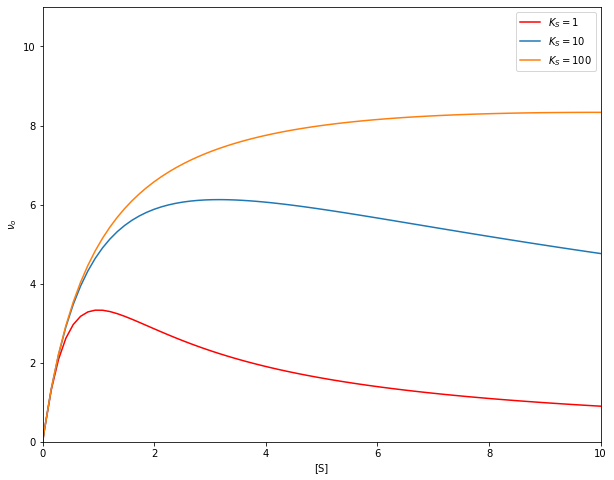

In [43]:
plt.figure(figsize=(10,8))
plt.plot(S,MM(S,1,10,1),label='$K_S=$1',color='red')
plt.plot(S,MM(S,1,10,10),label='$K_S=$10')
plt.plot(S,MM(S,1,10,100),label='$K_S=$100')


plt.xlim(0,10)
plt.ylim(0,11)
plt.legend()
plt.xlabel('[S]')
plt.ylabel(r'$\nu_o$')
plt.savefig('subsinh.png')
plt.show()
